In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

Картинка из лабы 5

(225, 225)


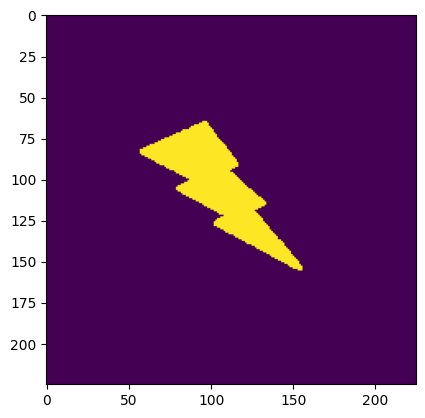

In [9]:
img = cv.imread('../../img/light.png', cv.IMREAD_GRAYSCALE)
print(img.shape)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
plt.imshow(thresh)

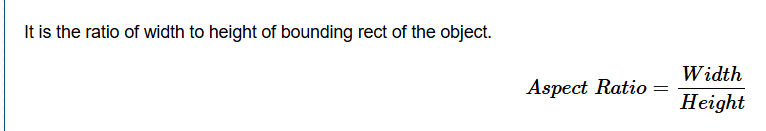

In [3]:
x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.0879120879120878

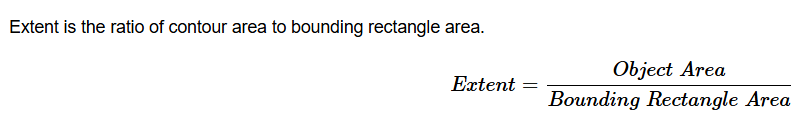

In [4]:
area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
extent

0.2969252969252969

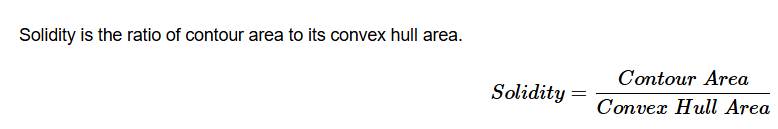

In [5]:
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area
solidity

0.8131934944520444

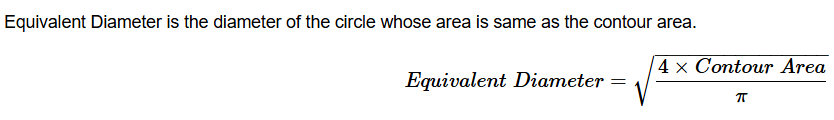

In [6]:
area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

np.float64(58.360224315594955)

In [7]:
(x,y),(MA,ma),angle = cv.fitEllipse(cnt)
angle

135.4748077392578

In [16]:
mask = np.zeros(img.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv.findNonZero(mask)

In [18]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(img,mask = mask)
min_val, max_val, min_loc, max_loc

(134.0, 255.0, (97, 65), (94, 66))

In [19]:
mean_val = cv.mean(img,mask = mask)
mean_val

(250.906083244397, 0.0, 0.0, 0.0)

((np.int32(57), np.int32(82)),
 (np.int32(155), np.int32(155)),
 (np.int32(95), np.int32(65)),
 (np.int32(153), np.int32(155)))

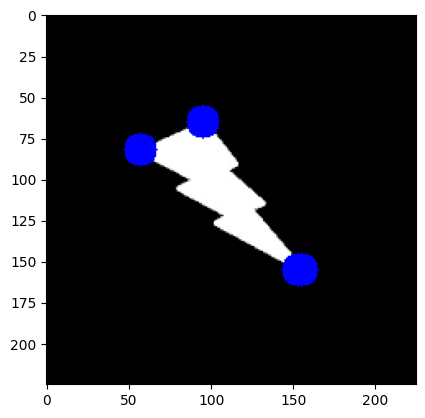

In [21]:
draw_img = cv.imread('../../img/light.png')

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv.circle(draw_img, leftmost, 10, (0,0,255), -1)
cv.circle(draw_img, rightmost, 10, (0,0,255), -1)
cv.circle(draw_img, topmost, 10, (0,0,255), -1)
cv.circle(draw_img, bottommost, 10, (0,0,255), -1)

plt.imshow(draw_img)

leftmost, rightmost, topmost, bottommost

